# Breast Cancer Classification

In this notebook we will take data from sklearn's own dataset breast_cancer.  The data is a copy from UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.  The data is computed from a digitized image of a fine needle\naspirate (FNA) of a breast mass. The data contains information on whether these breast masses are malignant or benign. 

We will take this data set and apply a K Neighbors classifier, which is a supervised machine learning algorithm that can be used to solve both classification and regression problems. The classifier works by normalizing the data, and checking a new data point against the points that it already knows.  It computes the distance between these normalized points and classifies the new point based on what the nearest points are.  The k value that is plugged into the classifier decides how many nearby points to take into consideration when classifying the new point. For example, if you have k = 3, the classifier will consider the three nearest points, and based on whether those points contained a malignant or beign mass.  If the majority of the points nearby signifiy malignant tumors, the model will classify the new point as malignant.

Our goal is to create a K Neighbors classifier model that will be trained on some of our data, and then be able to predict, with a fairly high level of accuracy, whether our testing data contains malignant or benign tumors.

### Table of Contents
 - Exploring the Data
 - Building and Training Our Model
 - Testing Our Model
 - Conclusion

## Exploring the Data

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

We will load our data.

In [3]:
breast_cancer_data = load_breast_cancer()

Now let's take a look at our first data entry to get an idea of what the data looks like.

In [11]:
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
print(breast_cancer_data.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [7]:
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We are trying to figure out if the tumors in question are malignant or benign, so lets look at the data that talks about whether the tumors are malignant or benign.

In [12]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

From this, we can see that if the entry is 0, the tumor is found to be malignant and if the entry is 1, the tumor is found to be benign.

## Buildng and Training Our Model

So the previous information on whether tumors are benign or malignant is the data that we will use to train our model.  We need to split up the data into training portions and test portions. We will use a training size of 80% and a testing size of 20%.

In [15]:
training_set, validation_set, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

Let's check that everything went the way we expect and our training and validation sets are the same size as their respective labels.

In [19]:
print(training_set.shape)
print(training_labels.shape)
print(validation_set.shape)
print(validation_labels.shape)

(455, 30)
(455,)
(114, 30)
(114,)


Now that we have that, we can build our model.

In [21]:
classifier = KNeighborsClassifier(n_neighbors = 3)

Now that we have our model with k = 3, we can train it using our training_set and training_labels data.

In [22]:
classifier.fit(training_set, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Testing Our Model

Now that we have trained our model, we will test it using the validation_set and validation_labels data.  With this, we will get a score that indicates the accuracy of our model after training.

In [24]:
score = classifier.score(validation_set, validation_labels)
print(score)

0.9473684210526315


Nice, it looks pretty good! However, there could be a more accurate model with a different k value.  Let's look through some different k values and see what is most accurate.  We will loop through k = 1 to k = 100 and see what k gives the best accuracy score.

In [30]:
accuracies= []
for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_set, training_labels)
  accuracies.append(classifier.score(validation_set, validation_labels))

Now that we have all the accuracy scores for those k values, lets plot them.

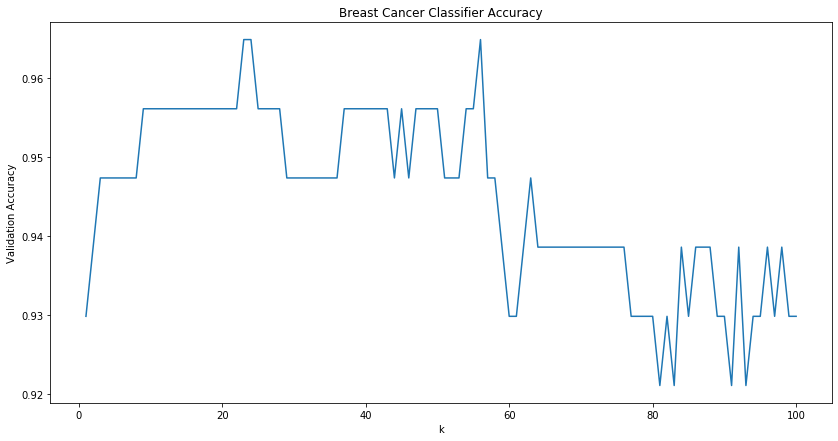

In [46]:
k_list = range(1, 101)
plt.figure(figsize = (14, 7))
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

## Conclusion

We were able to build a K Neighbors classifier that could predict whether a tumor was benign or malignant with a validation score of over 0.96, and check what k value gave us that highest validation score.